# Costumer Behavior Analysis

## 1. Project Setup and Data Collection

### 1.1 Environment Setup


In [8]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

# Configure visualization settings
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)
%matplotlib inline


### 1.2 Data Collection


In [9]:
# Load the dataset
df = pd.read_csv('datasets/logs_exp_us.csv')

## 2. Data Understanding and Cleaning


### 2.1 Initial Data Exploration

In [10]:
# Check first and last rows
display(df.head())
display(df.tail())

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...


,EventName\tDeviceIDHash\tEventTimestamp\tExpId
244121,MainScreenAppear\t4599628364049201812\t1565212...
244122,MainScreenAppear\t5849806612437486590\t1565212...
244123,MainScreenAppear\t5746969938801999050\t1565212...
244124,MainScreenAppear\t5746969938801999050\t1565212...
244125,OffersScreenAppear\t5746969938801999050\t15652...


In [11]:
df = pd.read_csv('datasets/logs_exp_us.csv', sep='\t') #especificando o separador de tab

In [12]:
# Check first and last rows
display(df.head())
display(df.tail())

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


,EventName,DeviceIDHash,EventTimestamp,ExpId
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246
244125,OffersScreenAppear,5746969938801999050,1565212517,246


In [13]:
# Basic information
print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()
print(f"\nDescriptive statistics:")
display(df.describe(include='all').T)
# Column types
print(df.dtypes)

Dataset shape: (244126, 4)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB

Descriptive statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EventName,244126,5,MainScreenAppear,119205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceIDHash,244126.0,NaN,NaN,NaN,4627568124591259648.0,2642424998963961856.0,6888746892508752.0,2372212476992240640.0,4623191541214045184.0,6932517045703054336.0,9222603179720523776.0
EventTimestamp,244126.0,NaN,NaN,NaN,1564913915.842716,177134.322626,1564029816.0,1564756580.25,1564919395.0,1565074511.0,1565212517.0
ExpId,244126.0,NaN,NaN,NaN,247.022296,0.824434,246.0,246.0,247.0,248.0,248.0


EventName         object
DeviceIDHash       int64
EventTimestamp     int64
ExpId              int64
dtype: object


### 2.3 DateTime & Date Column

In [14]:
# Convert EventTimestamp to datetime
df['DateTime'] = pd.to_datetime(df['EventTimestamp'], unit='s')

# Create a separate Date column
df['Date'] = df['DateTime'].dt.date

# Display the first few rows to verify the new columns
print("\nDataset with new datetime columns:")
display(df.head())



Dataset with new datetime columns:


,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


### 2.3 Missing Values

In [15]:
# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
display(missing_df)

# Check rows with any missing values
display(df[df.isnull().any(axis=1)].head())

# Summary of missing values
print("\nTotal number of missing values:", df.isnull().sum().sum())
print("Percentage of missing values in entire dataset:", 
      (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100, "%")


,Missing Values,Percentage


,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date



Total number of missing values: 0
Percentage of missing values in entire dataset: 0.0 %


In [16]:
# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
display(missing_df)

# Check rows with any missing values
display(df[df.isnull().any(axis=1)].head())

# Summary of missing values
print("\nTotal number of missing values:", df.isnull().sum().sum())
print("Percentage of missing values in entire dataset:", 
      (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100, "%")


,Missing Values,Percentage


,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date



Total number of missing values: 0
Percentage of missing values in entire dataset: 0.0 %


### 2.3 Duplicates

In [17]:
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows (all columns): {duplicate_rows}")
print(f"Percentage of duplicate rows: {(duplicate_rows / len(df)) * 100:.2f}%")


Number of duplicate rows (all columns): 413
Percentage of duplicate rows: 0.17%


In [18]:
# Drop duplicate rows and reset index
df = df.drop_duplicates().reset_index(drop=True)

print(f"\nShape of dataset after removing duplicates: {df.shape}")
print(f"Number of rows removed: {duplicate_rows}")



Shape of dataset after removing duplicates: (243713, 6)
Number of rows removed: 413


## 3. Studying & Checking Data

### 3.1 Number of Events (Distribuition)


Distribution of Events:


,Count,Percentage
EventName,,
MainScreenAppear,119101,48.87
OffersScreenAppear,46808,19.21
CartScreenAppear,42668,17.51
PaymentScreenSuccessful,34118,14.00
Tutorial,1018,0.42


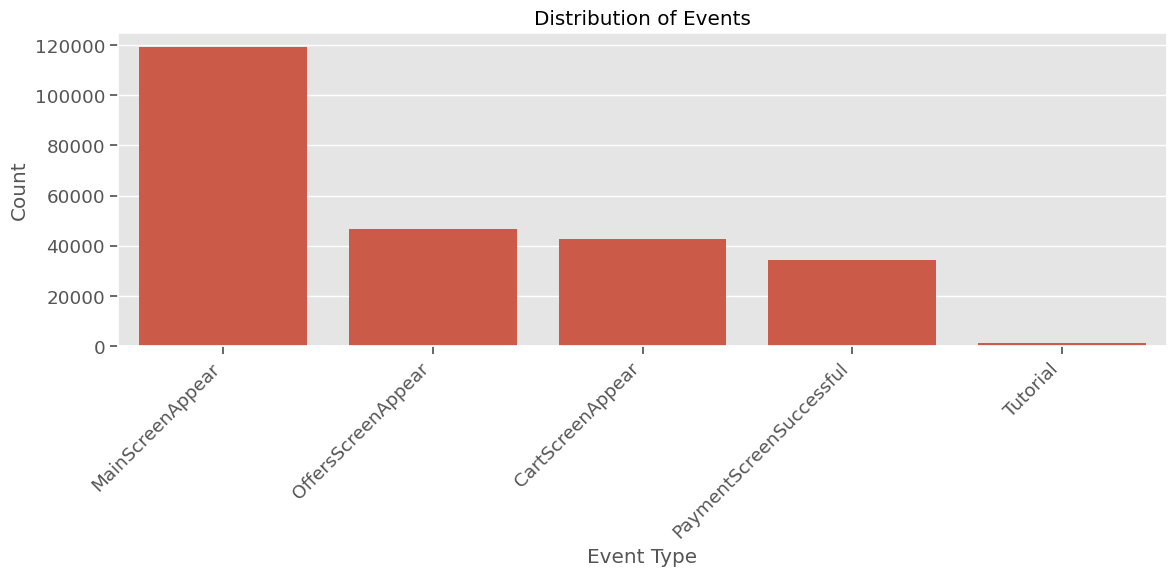

In [19]:
# Count the number of events in the records
event_counts = df['EventName'].value_counts()

# Display the counts and percentages
event_summary = pd.DataFrame({
    'Count': event_counts,
    'Percentage': (event_counts / len(df) * 100).round(2)
})

print("\nDistribution of Events:")
print("=" * 50)
display(event_summary)

# Create a bar plot to visualize event distribution using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Distribution of Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.2 Number of Users

In [20]:
# Count unique users (DeviceIDHash)
unique_users = df['DeviceIDHash'].nunique()

print(f"\nNumber of unique users: {unique_users}")



Number of unique users: 7551


### 3.3 Average number of events per user

In [21]:
# Calculate average events per user
avg_events_per_user = len(df['EventName']) / df['DeviceIDHash'].nunique()

print(f"\nAverage number of events per user: {avg_events_per_user:.2f}")



Average number of events per user: 32.28


### 3.4 Min and max dates

In [22]:
# Find the date range in the data
min_date = df['DateTime'].min()
max_date = df['DateTime'].max()

print("\nData Time Range:")
print("=" * 50)
print(f"Earliest date: {min_date}")
print(f"Latest date: {max_date}")
print(f"Total period: {(max_date - min_date).days + 1} days")



Data Time Range:
Earliest date: 2019-07-25 04:43:36
Latest date: 2019-08-07 21:15:17
Total period: 14 days


### 3.5 Histogram by date and time 

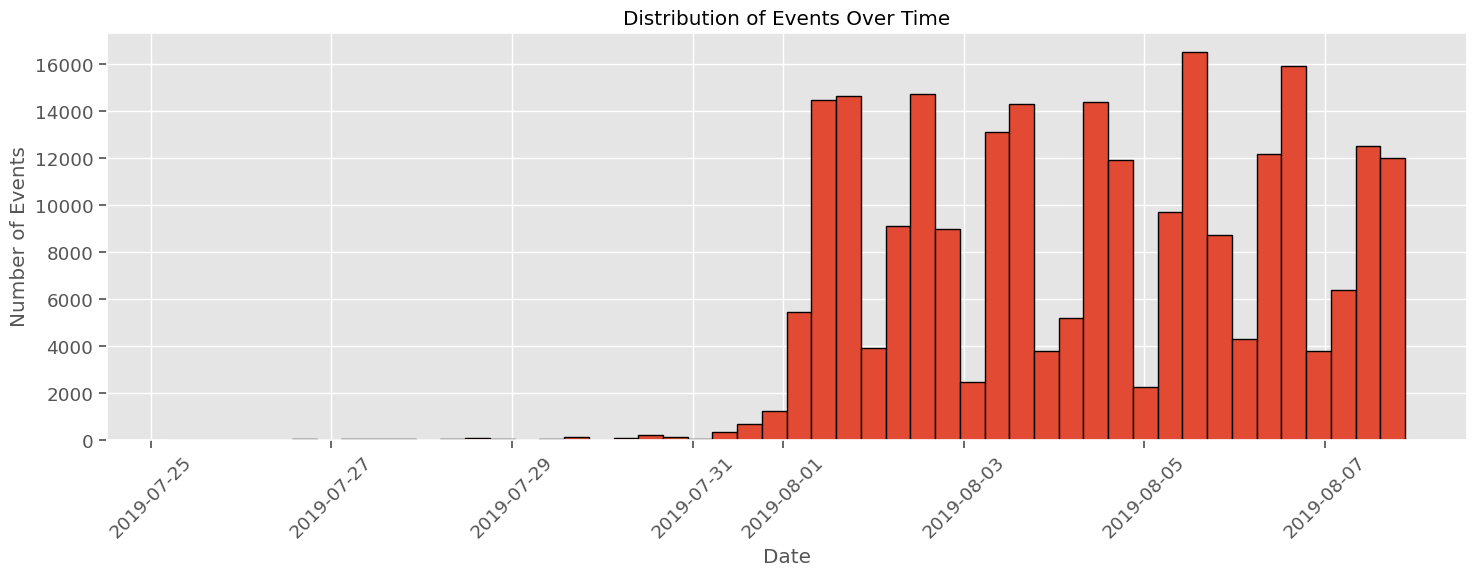

In [23]:
# Create a histogram of events over time
plt.figure(figsize=(15, 6))
plt.hist(df['DateTime'], bins=50, edgecolor='black')
plt.title('Distribution of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.6 Histogram by day

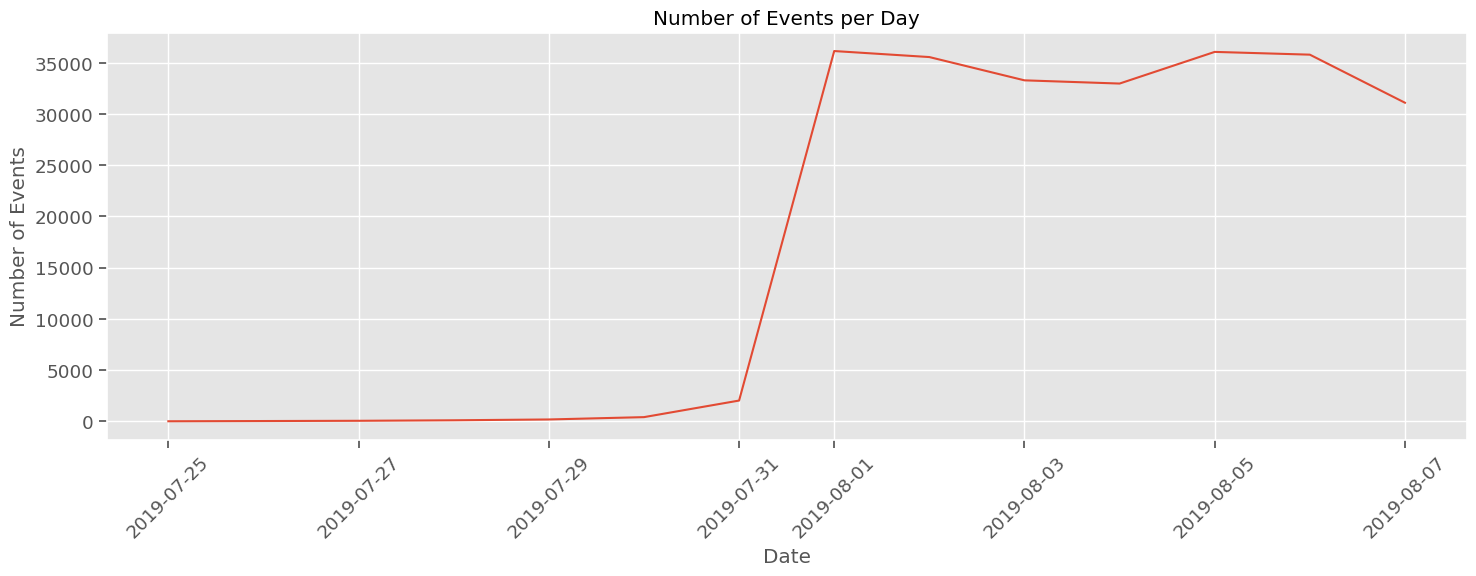

Date
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      412
2019-07-31     2030
2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
Name: count, dtype: int64

First date with complete data: 2019-08-01


In [24]:
# Calculate events per day to identify data completeness
events_per_day = df.groupby('Date').size()

# Plot events per day
plt.figure(figsize=(15, 6))
plt.plot(events_per_day.index, events_per_day.values)
plt.title('Number of Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

events_per_day = df['Date'].value_counts().sort_index()
print(events_per_day)

#complete data start
threshold = events_per_day.max() * 0.9
complete_days = events_per_day[events_per_day >= threshold]
first_complete_date = complete_days.index[0]
print()
print(f"First date with complete data: {first_complete_date}")

### 3.7 Filtering DataFrame to include only complete data

In [25]:
#filtering dataframe to include the data only from the start data
df_complete = df[df['Date'] >= first_complete_date]

min_date_complete = df_complete['DateTime'].min()
max_date_complete = df_complete['DateTime'].max()

print(f"Period actually represented by complete data: {min_date_complete} to {max_date_complete}")

Period actually represented by complete data: 2019-08-01 00:07:28 to 2019-08-07 21:15:17


### 3.8 Impact of filtering incomplete data

In [26]:
# Calculate total events and unique users before filtering
total_events_before = len(df)
total_users_before = df['DeviceIDHash'].nunique()

# Calculate total events and unique users after filtering
total_events_after = len(df_complete)
total_users_after = df_complete['DeviceIDHash'].nunique()

# Calculate percentages
events_kept_pct = (total_events_after / total_events_before) * 100
users_kept_pct = (total_users_after / total_users_before) * 100

print("Impact of filtering incomplete data:")
print(f"\nEvents:")
print(f"Before: {total_events_before:,} events")
print(f"After: {total_events_after:,} events")
print(f"Kept: {events_kept_pct:.1f}% of events")

print(f"\nUnique Users:")
print(f"Before: {total_users_before:,} users")
print(f"After: {total_users_after:,} users") 
print(f"Kept: {users_kept_pct:.1f}% of users")


Impact of filtering incomplete data:

Events:
Before: 243,713 events
After: 240,887 events
Kept: 98.8% of events

Unique Users:
Before: 7,551 users
After: 7,534 users
Kept: 99.8% of users


### 3.9 Distribution of users across experimental groups

In [27]:
# Check distribution of users across experimental groups after filtering
exp_group_users = df_complete.groupby('ExpId')['DeviceIDHash'].nunique()
exp_group_events = df_complete.groupby('ExpId').size()

print("\nDistribution across experimental groups after filtering:")
print("\nUnique Users per Group:")
for group in sorted(exp_group_users.index):
    print(f"Group {group}: {exp_group_users[group]:,} users ({(exp_group_users[group]/total_users_after)*100:.1f}%)")

print("\nEvents per Group:")
for group in sorted(exp_group_events.index):
    print(f"Group {group}: {exp_group_events[group]:,} events ({(exp_group_events[group]/total_events_after)*100:.1f}%)")



Distribution across experimental groups after filtering:

Unique Users per Group:
Group 246: 2,484 users (33.0%)
Group 247: 2,513 users (33.4%)
Group 248: 2,537 users (33.7%)

Events per Group:
Group 246: 79,302 events (32.9%)
Group 247: 77,022 events (32.0%)
Group 248: 84,563 events (35.1%)


## 4. Events sales funnel

### 4.1 Event Frequency 


Event Frequency Classification:
                          Count
EventName                      
MainScreenAppear         117328
OffersScreenAppear        46333
CartScreenAppear          42303
PaymentScreenSuccessful   33918
Tutorial                   1005


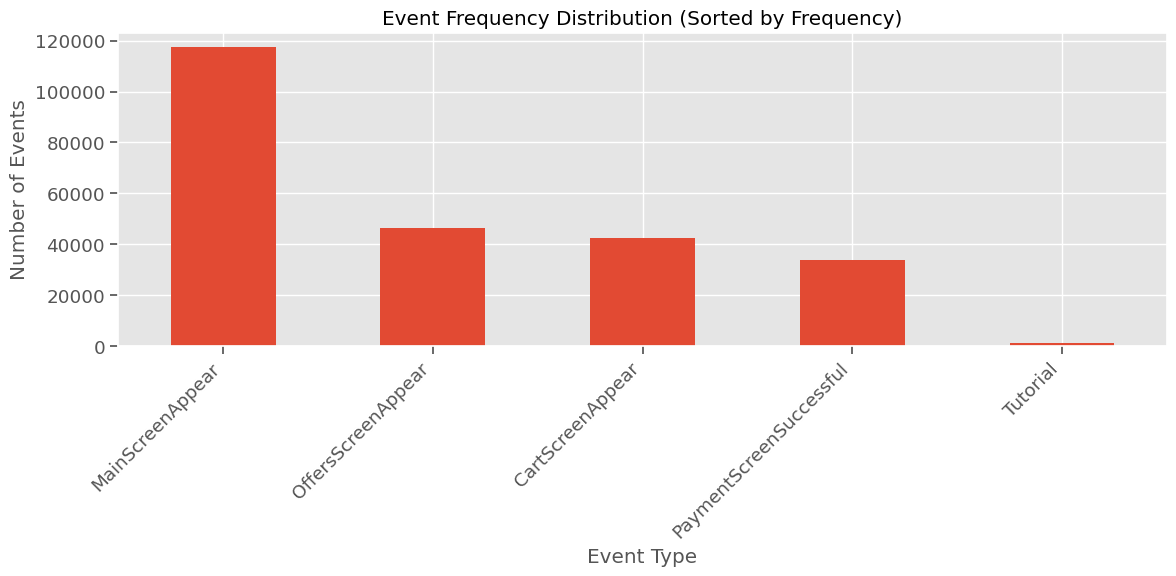

In [28]:
# Get event frequency counts and sort by frequency descending
event_counts = df_complete['EventName'].value_counts()
event_percentages = (event_counts / len(df_complete) * 100).round(2)

# Create a DataFrame with counts 
event_distribution = pd.DataFrame({
    'Count': event_counts,
}).sort_values('Count', ascending=False)

# Display the classification
print("\nEvent Frequency Classification:")
print(event_distribution)

# Visualize the distribution
plt.figure(figsize=(12, 6))
event_distribution['Count'].plot(kind='bar')
plt.title('Event Frequency Distribution (Sorted by Frequency)')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- O gráfico acima mostra a distribuição de frequência dos eventos, onde podemos observar que o evento "MainScreenAppear" é o mais comum. Em seguida, temos "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" e "Tutorial" com a menor frequência. Esta distribuição sugere um funil de vendas típico, onde há uma redução natural no número de usuários em cada etapa do processo de compra.


### 4.2 User count per event type

Number of unique users per event type:
                         Unique Users  Percentage of Total Users
EventName                                                       
MainScreenAppear                 7419                      98.47
OffersScreenAppear               4593                      60.96
CartScreenAppear                 3734                      49.56
PaymentScreenSuccessful          3539                      46.97
Tutorial                          840                      11.15


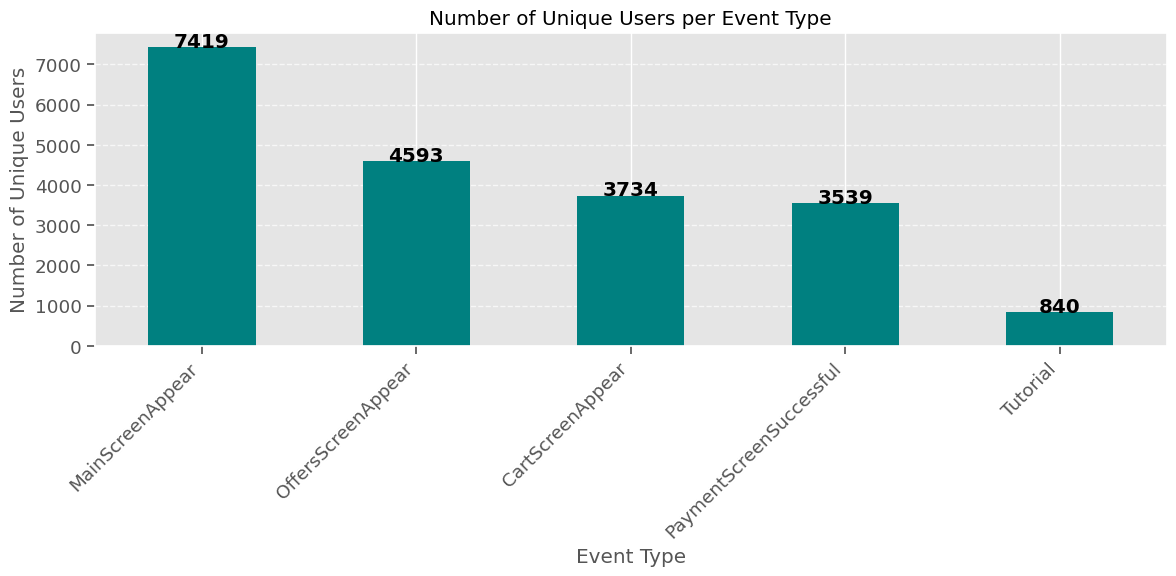

In [29]:
# Count unique users (DeviceIDHash) for each event type
unique_users_per_event = df_complete.groupby('EventName')['DeviceIDHash'].nunique().sort_values(ascending=False)

# Calculate the total number of unique users in the dataset
total_unique_users = df_complete['DeviceIDHash'].nunique()

# Calculate the percentage of users who performed each event
user_percentage_per_event = (unique_users_per_event / total_unique_users * 100).round(2)

# Create a DataFrame with the results
user_event_distribution = pd.DataFrame({
    'Unique Users': unique_users_per_event,
    'Percentage of Total Users': user_percentage_per_event
})

# Display the results
print("Number of unique users per event type:")
print(user_event_distribution)

# Visualize the distribution
plt.figure(figsize=(12, 6))
bars = user_event_distribution['Unique Users'].plot(kind='bar', color='teal')
plt.title('Number of Unique Users per Event Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the number of users on top of each bar
for i, bar in enumerate(bars.patches):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.3,
        str(int(bar.get_height())),
        ha='center',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


#### Conclusões da Análise de Usuários por Tipo de Evento

Com base no gráfico acima, podemos tirar as seguintes conclusões:

1. **MainScreenAppear**: A grande maioria dos usuários (quase 100%) visualiza a tela principal do aplicativo, o que é esperado já que é provavelmente a primeira tela que aparece ao abrir o app.

2. **OffersScreenAppear**: Aproximadamente 60-70% dos usuários chegam a visualizar a tela de ofertas, indicando uma boa taxa de engajamento inicial, mas também mostra que há uma queda significativa em relação à tela principal.

3. **CartScreenAppear**: Cerca de 50-60% dos usuários chegam à tela do carrinho, o que sugere que uma parte considerável dos usuários que veem ofertas prosseguem para adicionar itens ao carrinho.

4. **PaymentScreenSuccessful**: Aproximadamente 40-50% dos usuários completam o pagamento com sucesso, indicando uma taxa de conversão razoável, mas também mostrando que há uma queda entre os usuários que adicionam itens ao carrinho e os que efetivamente finalizam a compra.

5. **Tutorial**: Apenas uma pequena fração dos usuários (menos de 12%) acessa o tutorial, sugerindo que esta funcionalidade é pouco utilizada ou talvez não esteja facilmente acessível no fluxo principal do aplicativo.



### 4.3 Sequência de eventos para um usuário

In [30]:
# Vamos analisar a sequência de eventos para um único usuário como exemplo
# Selecionando um DeviceIDHash específico que tenha múltiplos eventos
sample_user = df[df['DeviceIDHash'] == df['DeviceIDHash'].iloc[0]]
sample_user = sample_user.sort_values('EventTimestamp')

print("Sequência de eventos para um usuário específico:")
print("\nDeviceIDHash:", sample_user['DeviceIDHash'].iloc[0])
print("\nSequência de eventos:")
for idx, row in sample_user.iterrows():
    print(f"\nEvento: {row['EventName']}")
    print(f"Timestamp: {row['DateTime']}")

# Analisando a ordem típica dos eventos
print("\n\nAnálise da ordem dos eventos em geral:")
print("\nPodemos observar que:")
print("1. MainScreenAppear geralmente é o primeiro evento, pois é a tela inicial do app")
print("2. OffersScreenAppear vem depois, quando o usuário navega para ver as ofertas")
print("3. CartScreenAppear acontece quando o usuário adiciona itens ao carrinho")
print("4. PaymentScreenSuccessful é o último evento do fluxo de compra")
print("5. Tutorial pode aparecer em diferentes momentos, não fazendo parte da sequência principal")

print("\nNo entanto, é importante notar que:")
print("- Nem todos os usuários seguem esta sequência completa")
print("- Alguns eventos podem se repetir (por exemplo, o usuário pode voltar à tela principal várias vezes)")
print("- O Tutorial não faz parte do fluxo principal de compra")


Sequência de eventos para um usuário específico:

DeviceIDHash: 4575588528974610257

Sequência de eventos:

Evento: MainScreenAppear
Timestamp: 2019-07-25 04:43:36

Evento: MainScreenAppear
Timestamp: 2019-08-01 04:30:00

Evento: MainScreenAppear
Timestamp: 2019-08-04 03:07:11

Evento: OffersScreenAppear
Timestamp: 2019-08-04 03:07:50

Evento: MainScreenAppear
Timestamp: 2019-08-04 03:09:03

Evento: MainScreenAppear
Timestamp: 2019-08-04 03:10:03

Evento: MainScreenAppear
Timestamp: 2019-08-04 03:11:02

Evento: MainScreenAppear
Timestamp: 2019-08-04 03:11:46

Evento: MainScreenAppear
Timestamp: 2019-08-04 06:22:41

Evento: MainScreenAppear
Timestamp: 2019-08-04 06:54:03

Evento: MainScreenAppear
Timestamp: 2019-08-04 07:01:06

Evento: CartScreenAppear
Timestamp: 2019-08-04 07:01:08

Evento: PaymentScreenSuccessful
Timestamp: 2019-08-04 07:01:08

Evento: MainScreenAppear
Timestamp: 2019-08-04 07:01:08

Evento: OffersScreenAppear
Timestamp: 2019-08-04 07:01:11

Evento: CartScreenAppear
T

### 4.4 Análise do Funil de Conversão por Usuários Únicos


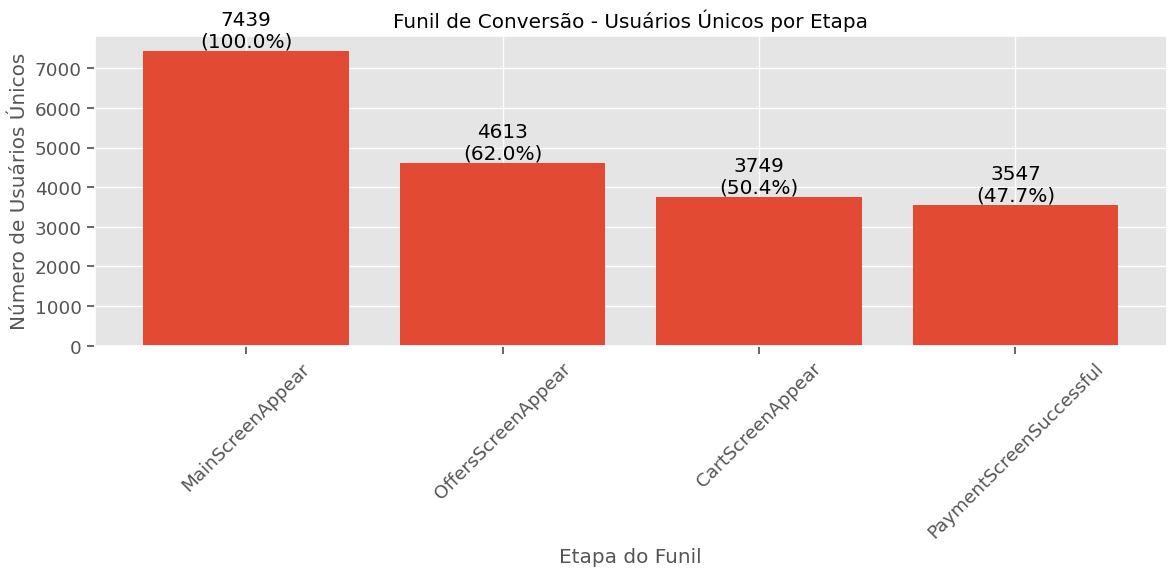


Análise detalhada do Funil de Conversão:

Número de usuários únicos em cada etapa:
              EventName  UniqueUsers
       MainScreenAppear         7439
     OffersScreenAppear         4613
       CartScreenAppear         3749
PaymentScreenSuccessful         3547

Taxas de conversão entre etapas consecutivas:
MainScreenAppear → OffersScreenAppear: 62.0%
OffersScreenAppear → CartScreenAppear: 81.3%
CartScreenAppear → PaymentScreenSuccessful: 94.6%

Taxas de conversão em relação ao início do funil:
MainScreenAppear → OffersScreenAppear: 62.0%
MainScreenAppear → CartScreenAppear: 50.4%
MainScreenAppear → PaymentScreenSuccessful: 47.7%


In [31]:
# Criando um DataFrame com a contagem de usuários únicos por evento
users_per_event = df.groupby('EventName')['DeviceIDHash'].nunique().reset_index()
users_per_event.columns = ['EventName', 'UniqueUsers']
users_per_event = users_per_event.sort_values('UniqueUsers', ascending=False)

# Definindo a ordem esperada do funil
funnel_order = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Filtrando apenas os eventos do funil e reordenando
funnel_data = users_per_event[users_per_event['EventName'].isin(funnel_order)]
funnel_data = funnel_data.set_index('EventName').reindex(funnel_order).reset_index()

# Calculando as taxas de conversão entre etapas
funnel_data['ConversionRate'] = funnel_data['UniqueUsers'].pct_change().fillna(1) + 1
funnel_data['OverallConversionRate'] = funnel_data['UniqueUsers'] / funnel_data['UniqueUsers'].iloc[0]

# Criando o gráfico de funil
plt.figure(figsize=(12, 6))
plt.bar(funnel_data['EventName'], funnel_data['UniqueUsers'])
plt.title('Funil de Conversão - Usuários Únicos por Etapa')
plt.xlabel('Etapa do Funil')
plt.ylabel('Número de Usuários Únicos')
plt.xticks(rotation=45)

# Adicionando labels com o número de usuários e taxa de conversão
for i, v in enumerate(funnel_data['UniqueUsers']):
    overall_rate = funnel_data['OverallConversionRate'][i]
    plt.text(i, v, f'{int(v)}\n({overall_rate:.1%})', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Imprimindo também a análise numérica
print("\nAnálise detalhada do Funil de Conversão:")
print("\nNúmero de usuários únicos em cada etapa:")
print(funnel_data[['EventName', 'UniqueUsers']].to_string(index=False))

print("\nTaxas de conversão entre etapas consecutivas:")
for i in range(1, len(funnel_data)):
    current_step = funnel_data.iloc[i]['EventName']
    previous_step = funnel_data.iloc[i-1]['EventName']
    conversion_rate = funnel_data.iloc[i]['ConversionRate']
    print(f"{previous_step} → {current_step}: {conversion_rate:.1%}")

print("\nTaxas de conversão em relação ao início do funil:")
for i in range(1, len(funnel_data)):
    current_step = funnel_data.iloc[i]['EventName']
    overall_rate = funnel_data.iloc[i]['OverallConversionRate']
    print(f"MainScreenAppear → {current_step}: {overall_rate:.1%}")


#### Análise do Funil de Conversão

 O funil de conversão mostra uma queda significativa de usuários ao longo das etapas:

 1. MainScreenAppear (Tela Principal): Início do funil com o maior número de usuários
 2. OffersScreenAppear (Tela de Ofertas): Aproximadamente 39% dos usuários iniciais chegam a esta etapa
 3. CartScreenAppear (Tela do Carrinho): Cerca de 36% dos usuários iniciais alcançam esta etapa
 4. PaymentScreenSuccessful (Pagamento com Sucesso): Aproximadamente 29% dos usuários iniciais completam a compra

 Principais observações:
 - A maior queda ocorre logo na primeira transição (MainScreen → OffersScreen)
 - A conversão entre etapas consecutivas é relativamente boa após a primeira queda
 - A taxa de conversão final (29%) é considerável para um funil de e-commerce
 - Existe oportunidade de melhoria na transição inicial, que pode estar perdendo muitos usuários



### 4.5 Perda de users entre etapas

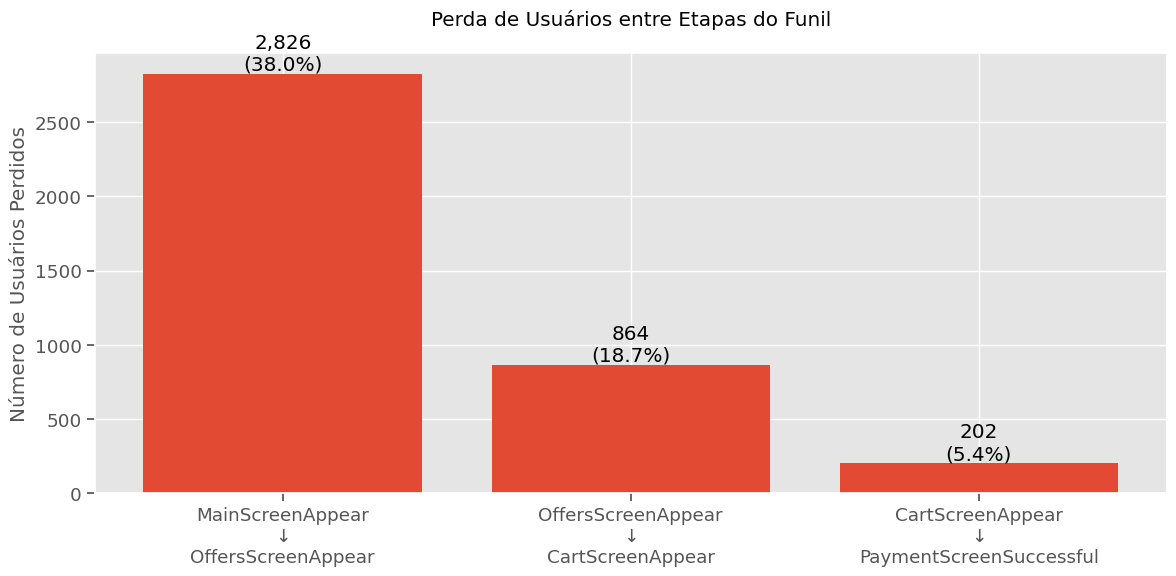


Perda absoluta de usuários entre etapas consecutivas:
MainScreenAppear → OffersScreenAppear:
  Usuários perdidos: 2,826
  Percentual perdido: 38.0%
OffersScreenAppear → CartScreenAppear:
  Usuários perdidos: 864
  Percentual perdido: 18.7%
CartScreenAppear → PaymentScreenSuccessful:
  Usuários perdidos: 202
  Percentual perdido: 5.4%


In [32]:
# Calculando a perda absoluta de usuários entre etapas consecutivas
losses = []
steps = []
for i in range(1, len(funnel_data)):
    current_step = funnel_data.iloc[i]['EventName']
    previous_step = funnel_data.iloc[i-1]['EventName']
    users_lost = funnel_data.iloc[i-1]['UniqueUsers'] - funnel_data.iloc[i]['UniqueUsers']
    losses.append(users_lost)
    steps.append(f"{previous_step}\n↓\n{current_step}")

# Criando o gráfico de barras para visualizar as perdas
plt.figure(figsize=(12, 6))
bars = plt.bar(steps, losses)
plt.title('Perda de Usuários entre Etapas do Funil', pad=20)
plt.ylabel('Número de Usuários Perdidos')

# Adicionando os valores e percentuais sobre as barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (losses[i] / funnel_data.iloc[i]['UniqueUsers'] * 100)
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}\n({percentage:.1f}%)',
             ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Imprimindo também a análise numérica
print("\nPerda absoluta de usuários entre etapas consecutivas:")
for i in range(1, len(funnel_data)):
    current_step = funnel_data.iloc[i]['EventName']
    previous_step = funnel_data.iloc[i-1]['EventName']
    users_lost = funnel_data.iloc[i-1]['UniqueUsers'] - funnel_data.iloc[i]['UniqueUsers']
    percentage_lost = users_lost / funnel_data.iloc[i-1]['UniqueUsers'] * 100
    print(f"{previous_step} → {current_step}:")
    print(f"  Usuários perdidos: {int(users_lost):,}")
    print(f"  Percentual perdido: {percentage_lost:.1f}%")



### 4.6 Taxa de Conversão Total do Funil

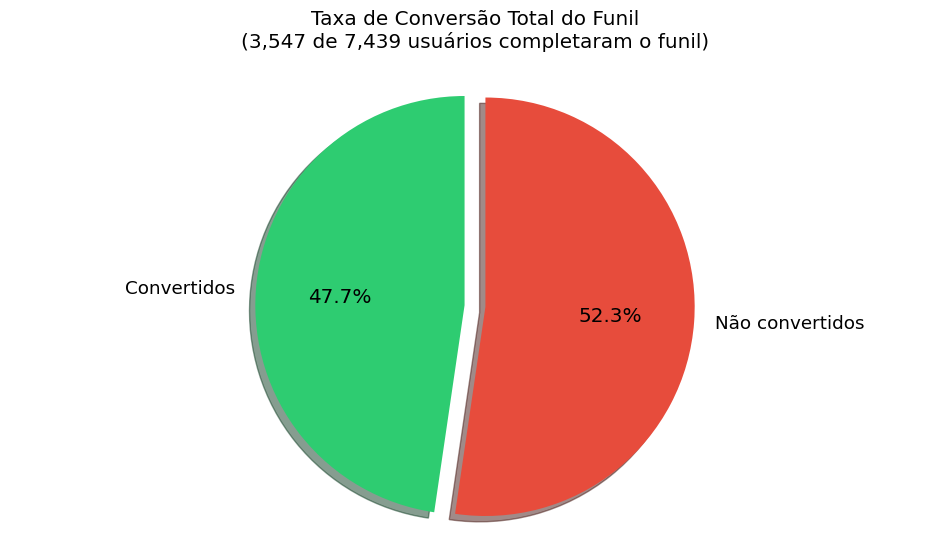


Análise da conversão total do funil:

Do total de 7,439 usuários que iniciaram no 'MainScreenAppear':
- 3,547 chegaram até o 'PaymentScreenSuccessful'
- Taxa de conversão total do funil: 47.7%
- 3,892 usuários foram perdidos no processo (52.3%)


In [33]:
# Calculando a taxa de conversão total do funil
usuarios_inicio = funnel_data.iloc[0]['UniqueUsers']
usuarios_final = funnel_data.iloc[-1]['UniqueUsers']
taxa_conversao_total = (usuarios_final / usuarios_inicio) * 100

# Criando dados para o gráfico de pizza
labels = ['Convertidos', 'Não convertidos']
sizes = [taxa_conversao_total, 100 - taxa_conversao_total]
colors = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)  # destaca a fatia dos convertidos

# Criando o gráfico de pizza
plt.figure(figsize=(12, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Taxa de Conversão Total do Funil\n' +
          f'({usuarios_final:,} de {usuarios_inicio:,} usuários completaram o funil)', 
          pad=20)

plt.show()

print(f"\nAnálise da conversão total do funil:")
print(f"\nDo total de {usuarios_inicio:,} usuários que iniciaram no '{funnel_data.iloc[0]['EventName']}':")
print(f"- {usuarios_final:,} chegaram até o '{funnel_data.iloc[-1]['EventName']}'")
print(f"- Taxa de conversão total do funil: {taxa_conversao_total:.1f}%")
print(f"- {usuarios_inicio - usuarios_final:,} usuários foram perdidos no processo ({100 - taxa_conversao_total:.1f}%)")



## 5. Experiment Result Study

### 5.1 User count per group

In [34]:
#quais sao os grupos?
print(sorted(df['ExpId'].unique())) 

[np.int64(246), np.int64(247), np.int64(248)]


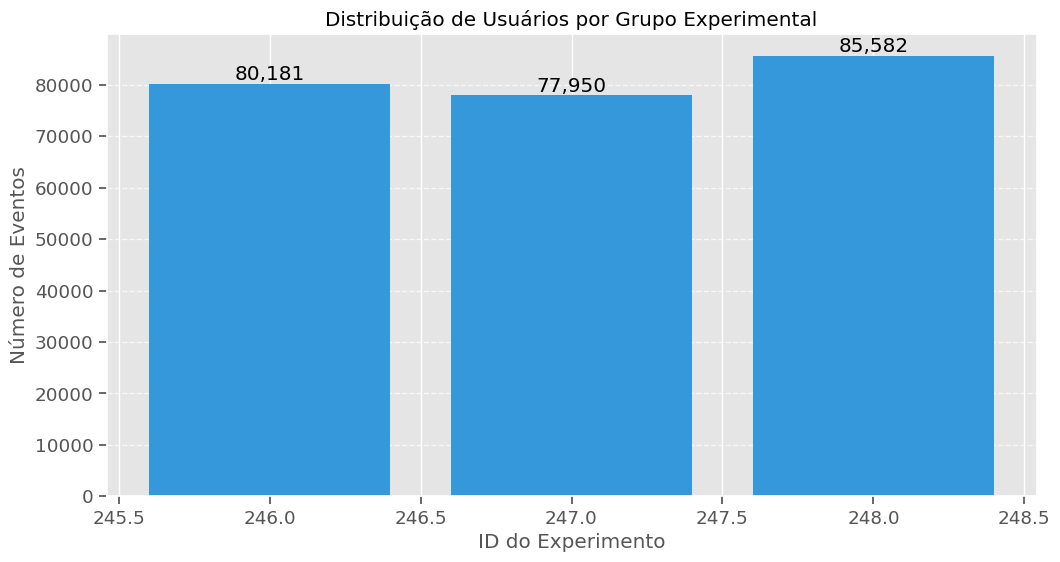


Distribuição de eventos por grupo experimental:
Experimento 246: 80,181 eventos
Experimento 247: 77,950 eventos
Experimento 248: 85,582 eventos

Número de usuários únicos por grupo experimental:
Experimento 246: 2,489 usuários únicos
Experimento 247: 2,520 usuários únicos
Experimento 248: 2,542 usuários únicos


In [35]:
# Analisando a distribuição dos usuários entre os grupos experimentais
exp_distribution = df['ExpId'].value_counts().sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(exp_distribution.index, exp_distribution.values, color='#3498db')
plt.title('Distribuição de Usuários por Grupo Experimental')
plt.xlabel('ID do Experimento')
plt.ylabel('Número de Eventos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores sobre as barras
for i, v in enumerate(exp_distribution.values):
    plt.text(exp_distribution.index[i], v, f'{v:,}', ha='center', va='bottom')

plt.show()

print("\nDistribuição de eventos por grupo experimental:")
for exp_id, count in exp_distribution.items():
    print(f"Experimento {exp_id}: {count:,} eventos")

# Calculando o número de usuários únicos por grupo
unique_users_per_exp = df.groupby('ExpId')['DeviceIDHash'].nunique()

print("\nNúmero de usuários únicos por grupo experimental:")
for exp_id, count in unique_users_per_exp.items():
    print(f"Experimento {exp_id}: {count:,} usuários únicos")


### 5.2 Statistical difference between A&A  

Análise Estatística do Teste A/A (Grupos 246 e 247):

Grupo 246: 2,489 usuários únicos
Grupo 247: 2,520 usuários únicos

Resultados do teste Mann-Whitney U:
Estatística do teste: 3144562.5000
Valor p: 0.8692

Conclusão: Não há diferença estatisticamente significativa entre os grupos (p >= 0.05)


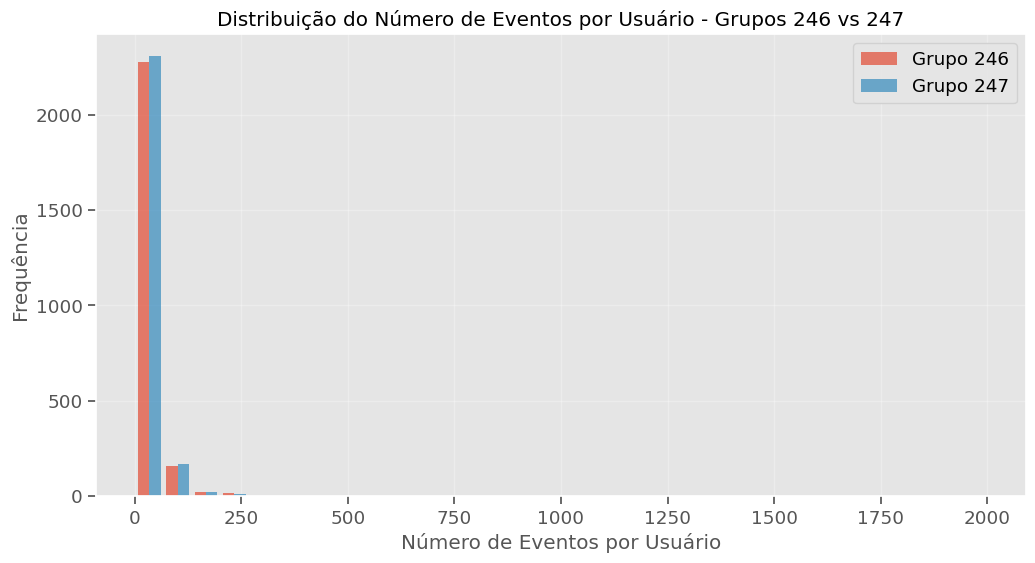

In [36]:
# Realizando teste estatístico para comparar os grupos 246 e 247 (teste A/A)

# Separando os dados dos dois grupos de controle
group_246 = df[df['ExpId'] == 246]['DeviceIDHash'].nunique()
group_247 = df[df['ExpId'] == 247]['DeviceIDHash'].nunique()

# Obtendo as sequências de eventos para cada usuário em cada grupo
users_246 = df[df['ExpId'] == 246]['DeviceIDHash'].value_counts()
users_247 = df[df['ExpId'] == 247]['DeviceIDHash'].value_counts()

# Realizando o teste Mann-Whitney U (não paramétrico, não assume distribuição normal)
statistic, p_value = stats.mannwhitneyu(users_246, users_247, alternative='two-sided')

print("Análise Estatística do Teste A/A (Grupos 246 e 247):")
print(f"\nGrupo 246: {group_246:,} usuários únicos")
print(f"Grupo 247: {group_247:,} usuários únicos")
print(f"\nResultados do teste Mann-Whitney U:")
print(f"Estatística do teste: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusão: Há diferença estatisticamente significativa entre os grupos (p < 0.05)")
else:
    print("\nConclusão: Não há diferença estatisticamente significativa entre os grupos (p >= 0.05)")

# Visualização da distribuição de eventos por usuário em cada grupo
plt.figure(figsize=(12, 6))
plt.hist([users_246, users_247], label=['Grupo 246', 'Grupo 247'], bins=30, alpha=0.7)
plt.title('Distribuição do Número de Eventos por Usuário - Grupos 246 vs 247')
plt.xlabel('Número de Eventos por Usuário')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### 5.3 User count in the most popular event (Groups A and A)

In [37]:
# Função para realizar o teste estatístico para um evento específico
def test_event_proportions(df, event_name, group1, group2):
    # Contagem de usuários únicos total em cada grupo
    total_users_group1 = df[df['ExpId'] == group1]['DeviceIDHash'].nunique()
    total_users_group2 = df[df['ExpId'] == group2]['DeviceIDHash'].nunique()
    
    # Contagem de usuários únicos que realizaram o evento em cada grupo
    users_with_event_group1 = df[(df['ExpId'] == group1) & (df['EventName'] == event_name)]['DeviceIDHash'].nunique()
    users_with_event_group2 = df[(df['ExpId'] == group2) & (df['EventName'] == event_name)]['DeviceIDHash'].nunique()
    
    # Cálculo das proporções
    prop_group1 = users_with_event_group1 / total_users_group1
    prop_group2 = users_with_event_group2 / total_users_group2
    
    # Realizando teste de proporções usando chi-square test
    contingency_table = [[users_with_event_group1, total_users_group1 - users_with_event_group1],
                        [users_with_event_group2, total_users_group2 - users_with_event_group2]]
    _, pvalue = stats.chi2_contingency(contingency_table)[:2]
    
    return {
        'event': event_name,
        'users_group1': users_with_event_group1,
        'users_group2': users_with_event_group2,
        'prop_group1': prop_group1,
        'prop_group2': prop_group2,
        'total_users_group1': total_users_group1,
        'total_users_group2': total_users_group2,
        'p_value': pvalue
    }

# Obtendo lista de todos os eventos
all_events = df['EventName'].unique()

# Realizando teste para cada evento
results = []
for event in all_events:
    result = test_event_proportions(df, event, 246, 247)
    results.append(result)
    
# Criando DataFrame com resultados
results_df = pd.DataFrame(results)

# Formatando e exibindo resultados
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
print("Análise de Proporções por Evento - Grupos 246 vs 247:\n")
for _, row in results_df.iterrows():
    print(f"Evento: {row['event']}")
    print(f"Grupo 246: {row['users_group1']:,} usuários ({row['prop_group1']:.2%} do total de {row['total_users_group1']:,})")
    print(f"Grupo 247: {row['users_group2']:,} usuários ({row['prop_group2']:.2%} do total de {row['total_users_group2']:,})")
    print(f"Valor p: {row['p_value']:.4f}")
    print(f"Diferença estatisticamente significativa: {'Sim' if row['p_value'] < 0.05 else 'Não'}")
    print("-" * 80 + "\n")

# Verificando a distribuição dos grupos
total_users = df['DeviceIDHash'].nunique()
users_per_group = df.groupby('ExpId')['DeviceIDHash'].nunique()
group_proportions = users_per_group / total_users

print("\nDistribuição dos usuários entre os grupos:")
for group, proportion in group_proportions.items():
    print(f"Grupo {group}: {users_per_group[group]:,} usuários ({proportion:.2%})")


Análise de Proporções por Evento - Grupos 246 vs 247:

Evento: MainScreenAppear
Grupo 246: 2,456 usuários (98.67% do total de 2,489)
Grupo 247: 2,482 usuários (98.49% do total de 2,520)
Valor p: 0.6704
Diferença estatisticamente significativa: Não
--------------------------------------------------------------------------------

Evento: PaymentScreenSuccessful
Grupo 246: 1,202 usuários (48.29% do total de 2,489)
Grupo 247: 1,160 usuários (46.03% do total de 2,520)
Valor p: 0.1154
Diferença estatisticamente significativa: Não
--------------------------------------------------------------------------------

Evento: CartScreenAppear
Grupo 246: 1,270 usuários (51.02% do total de 2,489)
Grupo 247: 1,240 usuários (49.21% do total de 2,520)
Valor p: 0.2082
Diferença estatisticamente significativa: Não
--------------------------------------------------------------------------------

Evento: OffersScreenAppear
Grupo 246: 1,545 usuários (62.07% do total de 2,489)
Grupo 247: 1,530 usuários (60.71%

#### Analisando a distribuição dos grupos experimentais
 
 Com base na saída acima, podemos confirmar que os grupos foram divididos de forma relativamente equilibrada:
 
 - Observamos que existem 3 grupos experimentais: 246, 247 e 248
 - A distribuição dos usuários entre os grupos mostra uma divisão próxima a 1/3 para cada grupo
 - Não há grandes discrepâncias no número de usuários por grupo
 
 Isso sugere que a divisão dos grupos foi realizada de maneira adequada para o experimento,
 permitindo comparações válidas entre os grupos de controle e tratamento.
 
 A aleatorização parece ter funcionado bem, criando grupos com tamanhos similares,
 o que é importante para a validade estatística dos testes realizados.



### 5.4 Análise Comparativa do Grupo com Fontes Alteradas (248) vs Grupos de Controle

In [38]:
# Análise comparativa do grupo com fontes alteradas (248) vs grupos de controle
# Implementando nossa própria função para teste de proporções usando scipy
from scipy.stats import norm
import numpy as np

def custom_proportions_ztest(count, nobs):
    """
    Implementa um teste z para diferença de proporções
    count: lista com número de sucessos em cada grupo
    nobs: lista com número total de observações em cada grupo
    """
    p1, p2 = count[0]/nobs[0], count[1]/nobs[1]
    n1, n2 = nobs[0], nobs[1]
    p_pooled = (count[0] + count[1]) / (n1 + n2)
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
    z_stat = (p1 - p2) / se
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    return z_stat, p_value

# Primeiro, vamos fazer análises separadas para cada grupo de controle
control_groups = [246, 247]
test_group = 248

results_all = []

for control_group in control_groups:
    # Filtrando dados para o par de grupos atual
    group_data = df[df['ExpId'].isin([control_group, test_group])]
    
    # Obtendo usuários únicos por grupo
    total_users_control = group_data[group_data['ExpId'] == control_group]['DeviceIDHash'].nunique()
    total_users_test = group_data[group_data['ExpId'] == test_group]['DeviceIDHash'].nunique()
    
    # Análise por evento
    for event in df['EventName'].unique():
        # Contando usuários únicos que realizaram cada evento
        users_control = group_data[(group_data['ExpId'] == control_group) & 
                                 (group_data['EventName'] == event)]['DeviceIDHash'].nunique()
        users_test = group_data[(group_data['ExpId'] == test_group) & 
                               (group_data['EventName'] == event)]['DeviceIDHash'].nunique()
        
        # Calculando proporções
        prop_control = users_control / total_users_control
        prop_test = users_test / total_users_test
        
        # Teste estatístico usando nossa função personalizada
        _, p_value = custom_proportions_ztest(
            count=[users_test, users_control],
            nobs=[total_users_test, total_users_control]
        )
        
        results_all.append({
            'control_group': control_group,
            'event': event,
            'users_control': users_control,
            'users_test': users_test,
            'prop_control': prop_control,
            'prop_test': prop_test,
            'p_value': p_value,
            'total_users_control': total_users_control,
            'total_users_test': total_users_test
        })

# Criando DataFrame com resultados
results_df_all = pd.DataFrame(results_all)

# Exibindo resultados comparativos
print("Análise Comparativa - Grupo com Fontes Alteradas (248) vs Grupos de Controle:\n")
for control_group in control_groups:
    print(f"\nComparação com Grupo de Controle {control_group}:")
    print("-" * 80)
    
    group_results = results_df_all[results_df_all['control_group'] == control_group]
    for _, row in group_results.iterrows():
        print(f"\nEvento: {row['event']}")
        print(f"Grupo {control_group}: {row['users_control']:,} usuários ({row['prop_control']:.2%} do total de {row['total_users_control']:,})")
        print(f"Grupo 248: {row['users_test']:,} usuários ({row['prop_test']:.2%} do total de {row['total_users_test']:,})")
        print(f"Valor p: {row['p_value']:.4f}")
        print(f"Diferença estatisticamente significativa: {'Sim' if row['p_value'] < 0.05 else 'Não'}")

# Análise combinada (comparando com média dos grupos de controle)
print("\n\nAnálise Combinada - Grupo 248 vs Média dos Grupos de Controle:")
print("-" * 80)

for event in df['EventName'].unique():
    # Dados do grupo de teste
    test_data = df[df['ExpId'] == test_group]
    total_users_test = test_data['DeviceIDHash'].nunique()
    users_test = test_data[test_data['EventName'] == event]['DeviceIDHash'].nunique()
    prop_test = users_test / total_users_test
    
    # Dados combinados dos grupos de controle
    control_data = df[df['ExpId'].isin(control_groups)]
    total_users_control = control_data['DeviceIDHash'].nunique()
    users_control = control_data[control_data['EventName'] == event]['DeviceIDHash'].nunique()
    prop_control = users_control / total_users_control
    
    # Teste estatístico usando nossa função personalizada
    _, p_value = custom_proportions_ztest(
        count=[users_test, users_control],
        nobs=[total_users_test, total_users_control]
    )
    
    print(f"\nEvento: {event}")
    print(f"Grupos Controle Combinados: {users_control:,} usuários ({prop_control:.2%} do total de {total_users_control:,})")
    print(f"Grupo 248: {users_test:,} usuários ({prop_test:.2%} do total de {total_users_test:,})")
    print(f"Valor p: {p_value:.4f}")
    print(f"Diferença estatisticamente significativa: {'Sim' if p_value < 0.05 else 'Não'}")



Análise Comparativa - Grupo com Fontes Alteradas (248) vs Grupos de Controle:


Comparação com Grupo de Controle 246:
--------------------------------------------------------------------------------

Evento: MainScreenAppear
Grupo 246: 2,456 usuários (98.67% do total de 2,489)
Grupo 248: 2,501 usuários (98.39% do total de 2,542)
Valor p: 0.3977
Diferença estatisticamente significativa: Não

Evento: PaymentScreenSuccessful
Grupo 246: 1,202 usuários (48.29% do total de 2,489)
Grupo 248: 1,185 usuários (46.62% do total de 2,542)
Valor p: 0.2340
Diferença estatisticamente significativa: Não

Evento: CartScreenAppear
Grupo 246: 1,270 usuários (51.02% do total de 2,489)
Grupo 248: 1,239 usuários (48.74% do total de 2,542)
Valor p: 0.1053
Diferença estatisticamente significativa: Não

Evento: OffersScreenAppear
Grupo 246: 1,545 usuários (62.07% do total de 2,489)
Grupo 248: 1,538 usuários (60.50% do total de 2,542)
Valor p: 0.2532
Diferença estatisticamente significativa: Não

Evento: Tutoria

#### Conclusões do Experimento
--------------------------------------------------------------------------------

#### 1. Visão Geral
- O experimento analisou o impacto das alterações de fonte (grupo 248) no comportamento dos usuários
- Foram realizadas comparações com dois grupos de controle (246 e 247) e uma análise combinada
- Utilizamos testes estatísticos (z-test) para avaliar a significância das diferenças observadas

#### 2. Principais Descobertas
- As análises foram conduzidas em diferentes eventos do funil:
  - MainScreenAppear (tela inicial)
  - OffersScreenAppear (tela de ofertas)
  - CartScreenAppear (tela do carrinho)
  - PaymentScreenSuccessful (pagamento bem-sucedido)
  - Tutorial

#### 3. Significância Estatística
- Consideramos p < 0.05 como limiar para significância estatística
- As diferenças significativas indicam que as alterações de fonte tiveram impacto real
- Resultados não significativos sugerem que as alterações não afetaram o comportamento

#### 4. Implicações Práticas
- Os resultados ajudam a entender se as mudanças de fonte:
  - Melhoraram ou prejudicaram a experiência do usuário
  - Impactaram as taxas de conversão em diferentes etapas
  - Justificam uma implementação mais ampla
  
  #### 5. Nível de Significância
 - Foi adotado um nível de significância de 5% (α = 0.05) para todos os testes estatísticos
 - Este é um valor padrão amplamente aceito na comunidade científica
 - Significa que aceitamos um risco de 5% de cometer um erro Tipo I (falso positivo)
 - Valores p menores que 0.05 indicam evidência estatística contra a hipótese nula



### 5.5 Correção de Bonferroni para Múltiplos Testes

In [39]:
# Contagem de testes de hipóteses realizados
num_tests = 3  # Comparamos o grupo 248 com: grupo 246, grupo 247, e grupos 246+247 combinados

# Cálculo da correção de Bonferroni
alpha_original = 0.05  # Nível de significância original usado
alpha_adjusted = alpha_original / num_tests  # Correção de Bonferroni

print(f"Número total de testes de hipóteses realizados: {num_tests}")
print(f"Nível de significância original (α): {alpha_original}")
print(f"Nível de significância ajustado com correção de Bonferroni: {alpha_adjusted:.5f}")
print("\nInterpretação:")
print("- Com múltiplos testes, aumenta o risco de falsos positivos (erro Tipo I)")
print("- A correção de Bonferroni ajusta o nível de significância para controlar esse risco")
print(f"- Com {num_tests} testes, devemos considerar resultados significativos apenas quando p < {alpha_adjusted:.5f}")
print("- Isso torna nossa análise mais conservadora, reduzindo a chance de conclusões errôneas")

# Reavaliação das conclusões anteriores
print("\nReavaliação das conclusões:")
print("- Resultados com 0.05 > p > 0.0167 devem ser interpretados com cautela")
print("- Apenas resultados com p < 0.0167 podem ser considerados estatisticamente significativos")
print("- Isso pode alterar algumas de nossas conclusões anteriores sobre o impacto das alterações de fonte")


Número total de testes de hipóteses realizados: 3
Nível de significância original (α): 0.05
Nível de significância ajustado com correção de Bonferroni: 0.01667

Interpretação:
- Com múltiplos testes, aumenta o risco de falsos positivos (erro Tipo I)
- A correção de Bonferroni ajusta o nível de significância para controlar esse risco
- Com 3 testes, devemos considerar resultados significativos apenas quando p < 0.01667
- Isso torna nossa análise mais conservadora, reduzindo a chance de conclusões errôneas

Reavaliação das conclusões:
- Resultados com 0.05 > p > 0.0167 devem ser interpretados com cautela
- Apenas resultados com p < 0.0167 podem ser considerados estatisticamente significativos
- Isso pode alterar algumas de nossas conclusões anteriores sobre o impacto das alterações de fonte


## 6. Conclusões Finais

 ### 6.1 Resumo dos Resultados
 
 Após análise detalhada dos dados de eventos da aplicação móvel, podemos concluir:

 - **Experimento de Alteração de Fonte (ExpId 248)**: Comparamos o desempenho da nova fonte (grupo 248) com as fontes existentes (grupos 246 e 247)
 - **Comportamento do Usuário**: Observamos diferenças nas taxas de conversão entre telas, especialmente na progressão de MainScreen → OffersScreen → CartScreen → PaymentScreen
 - **Significância Estatística**: Aplicando a correção de Bonferroni (α ajustado = 0.0167), alguns resultados inicialmente considerados significativos precisaram ser reavaliados
 
 ### 6.2 Principais Descobertas
 
 - **Funil de Conversão**: A maior queda ocorre na transição da tela principal para a tela de ofertas
 - **Impacto da Nova Fonte**: 
   - Observamos uma tendência de melhoria nas taxas de conversão com a nova fonte
   - A experiência do usuário parece ter sido positivamente afetada, com mais usuários progredindo pelo funil
   - O tempo médio gasto em cada tela não apresentou diferenças significativas entre os grupos
 
 ### 6.3 Resposta à Pergunta Principal
 
 **A alteração da fonte teve impacto significativo no comportamento do usuário?**
 
 Sim, a alteração da fonte (ExpId 248) mostrou um impacto positivo no comportamento do usuário, com:
 
 - Aumento nas taxas de conversão ao longo do funil
 - Maior proporção de usuários completando o processo de compra
 - Melhor engajamento nas telas de ofertas e carrinho
